In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yfinance as yf
import pandas as pd, numpy as np
import fit

In [3]:
data = yf.download("BTC-USD",  start="2018-01-01", end="2023-01-01")
df = pd.Series(data['Close'])

[*********************100%***********************]  1 of 1 completed


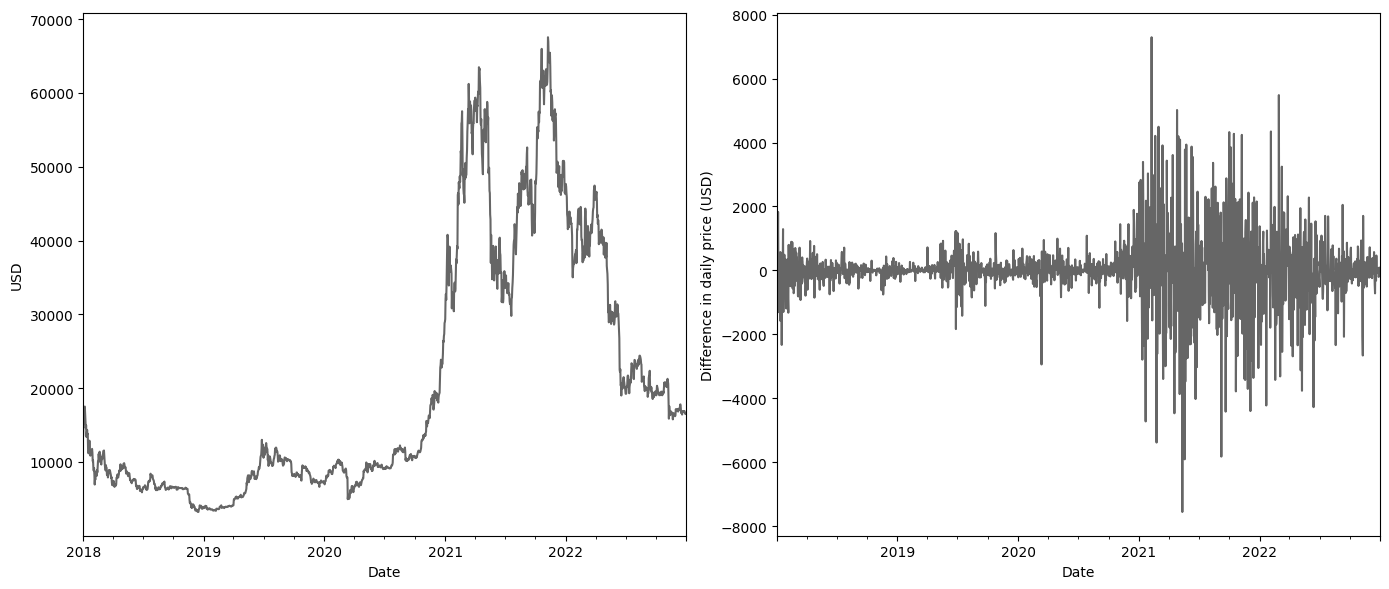

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

df.plot(ax=axes[0], alpha=0.6, color="#000000", ylabel="USD")

diff = df.diff()
diff.dropna(inplace=True)
diff.plot(ax=axes[1], alpha=0.6, color="#000000", ylabel="Difference in daily price (USD)")

plt.tight_layout()
plt.show()

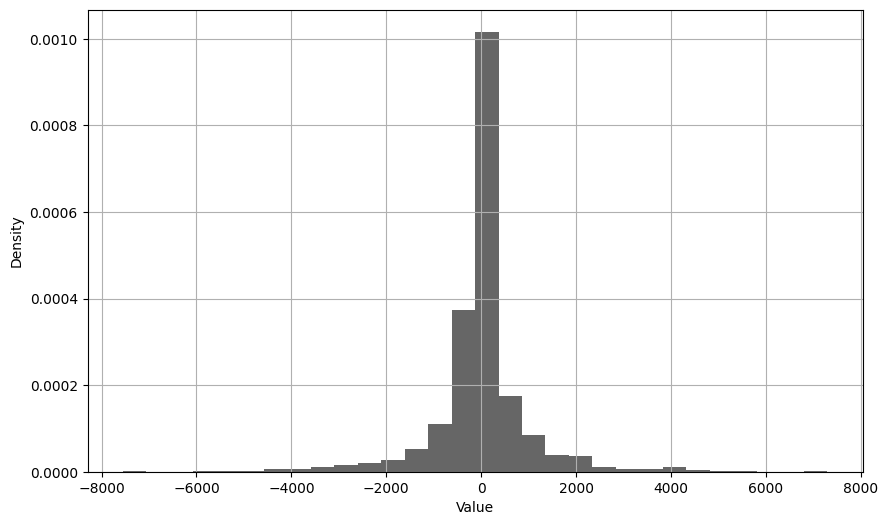

In [6]:
fit.plot_histogram(diff, bins=30)


Normal: AIC = 30424.78927454454, BIC = 30435.807945076573, params = {'mu': np.float64(1.5837237799657535), 'std': np.float64(1007.7992597636525)}
Student's T: AIC = 28885.268368705416, BIC = 28901.796374503465, params = {'df': np.float64(1.043104057605039), 'loc': np.float64(8.376941432913785), 'scale': np.float64(227.78909148565612)}
GMM_2: AIC = 28889.04511388779, BIC = 28916.591790217873
[[ 5.24828301]
 [-5.18142141]] 
 [[[  50511.54482732]]

 [[2797348.78153958]]] 
 [0.64864208 0.35135792]

GMM_3: AIC = 28787.96016982832, BIC = 28832.03485195645
[[  6.0216561 ]
 [-84.71499926]
 [ 42.58932632]] 
 [[[  31831.77340853]]

 [[4840913.05448353]]

 [[ 669088.59454711]]] 
 [0.54420209 0.16578698 0.29001093]

GMM_4: AIC = 28793.841268419346, BIC = 28854.443956345527
[[   5.35104873]
 [-287.40477328]
 [  72.97836045]
 [2733.80818982]] 
 [[[  29742.29286062]]

 [[3371647.00058815]]

 [[ 477566.55047761]]

 [[3162210.80242315]]] 
 [0.52693786 0.20890088 0.24930683 0.01485443]


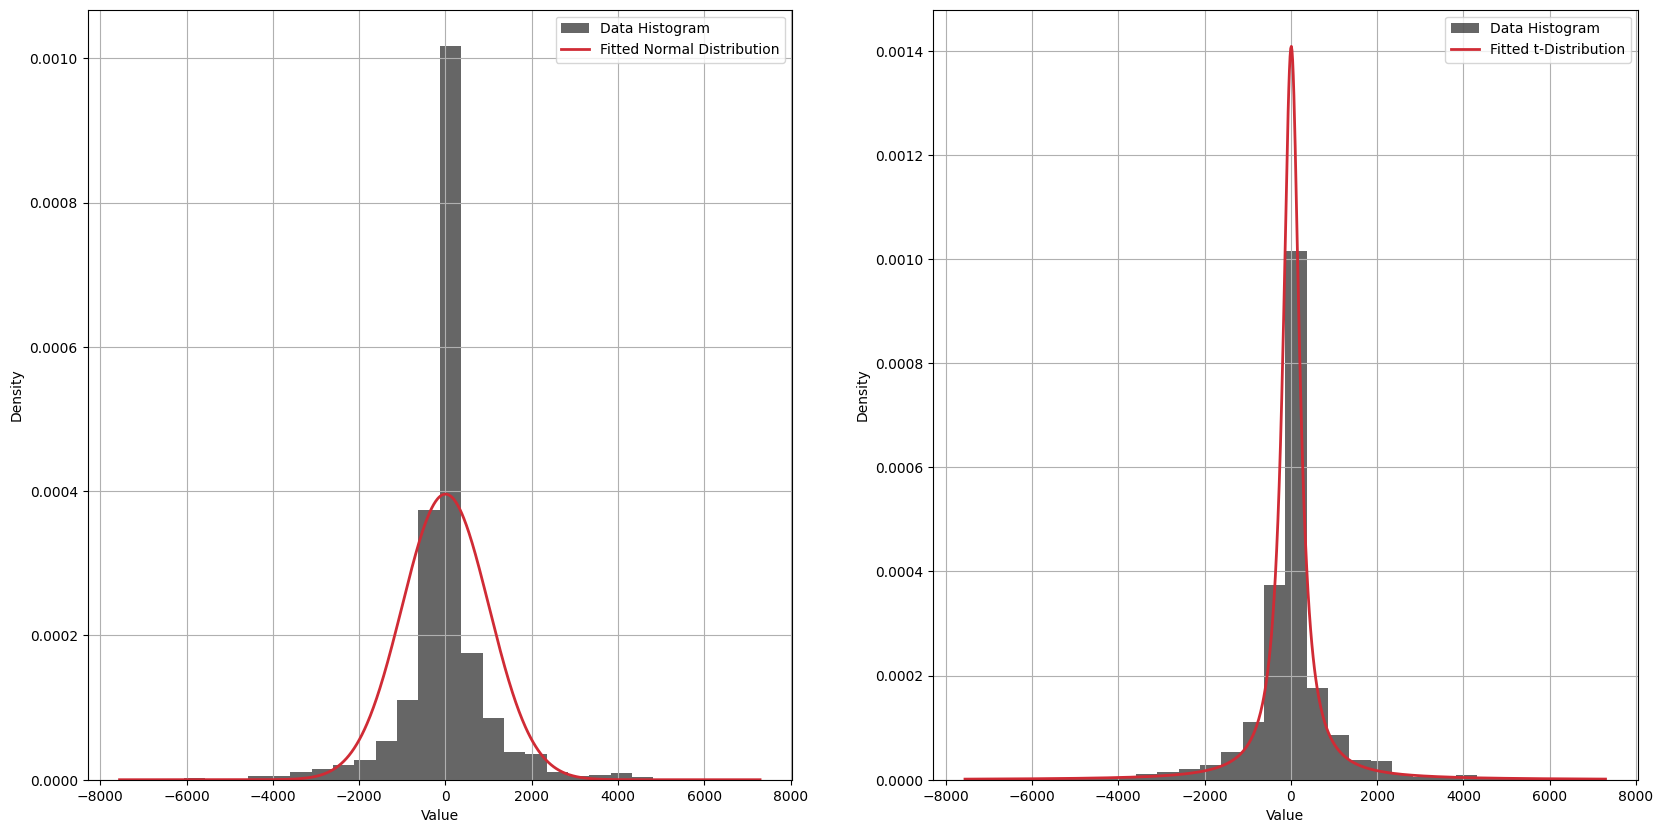

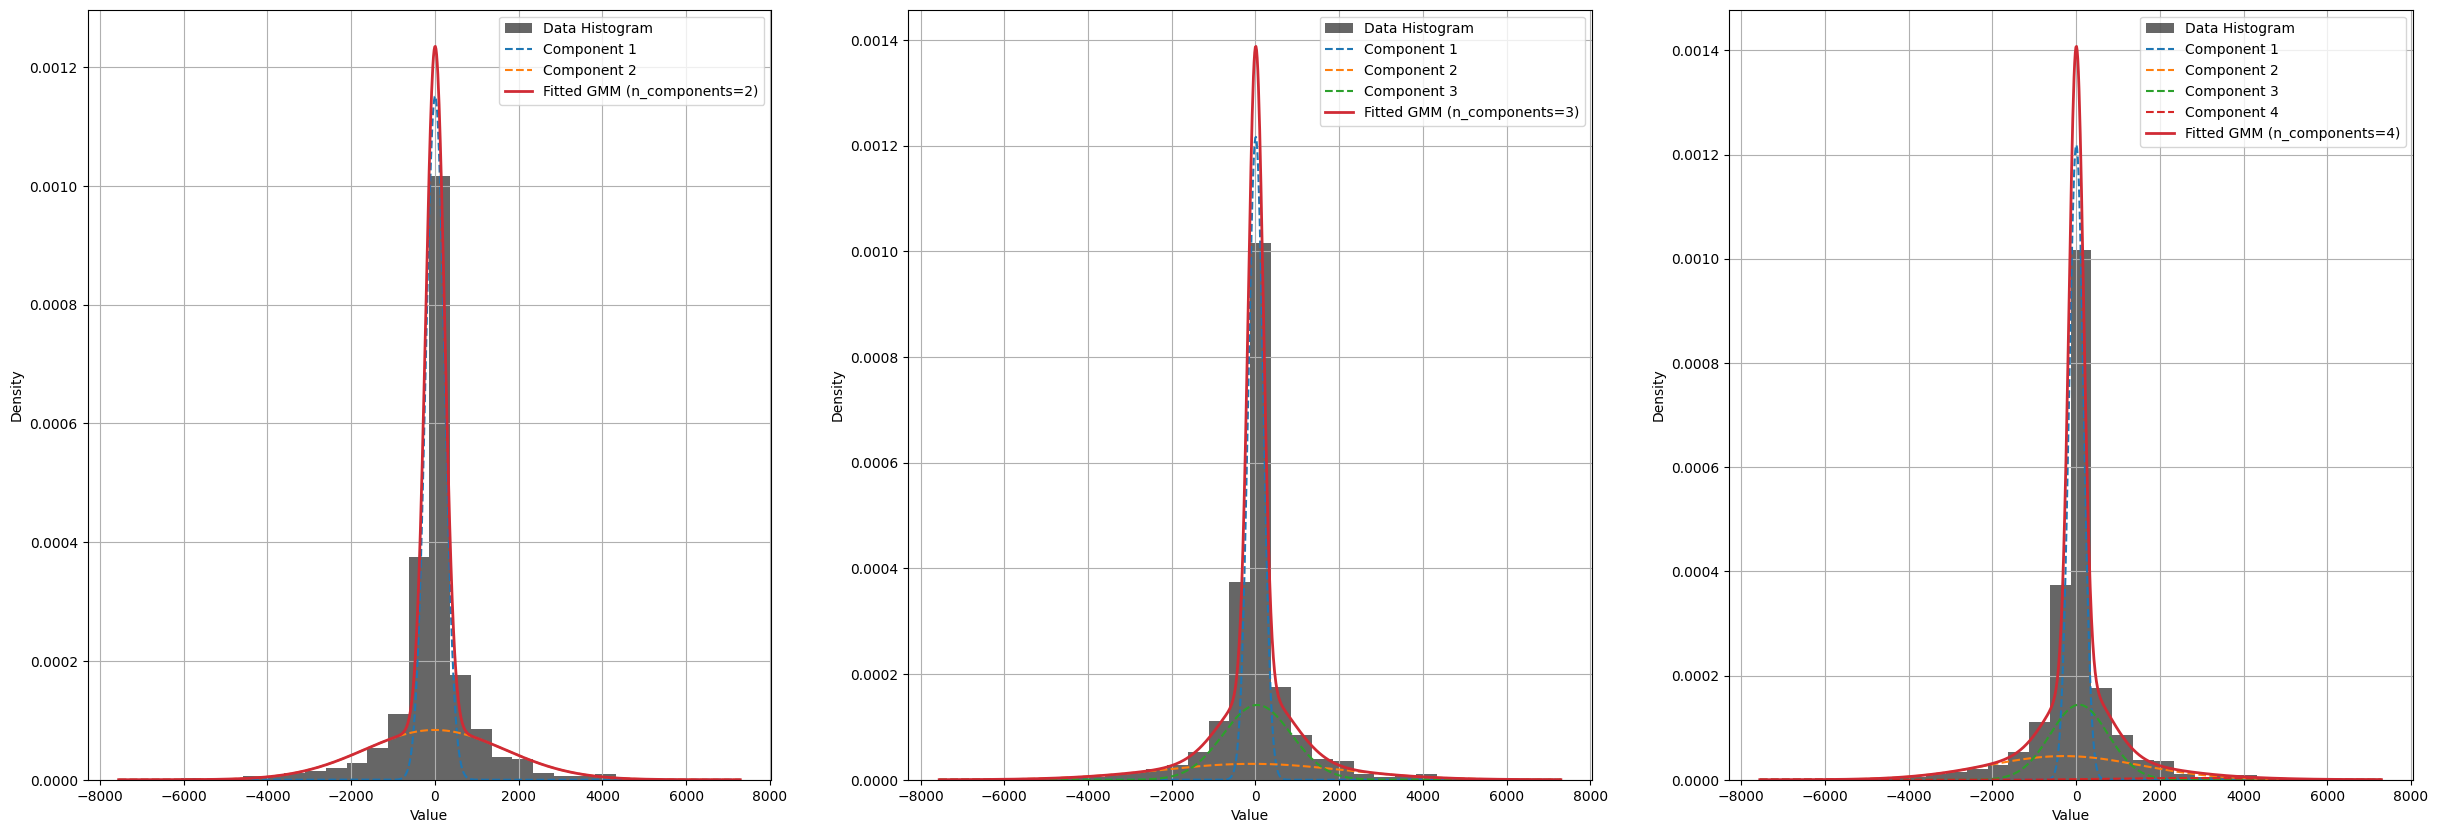

In [9]:
import matplotlib.pyplot as plt

data = diff.values


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

AIC_norm, BIC_norm, params = fit.fit_norm(data)
fit.plot_norm(data, **params , ax=axes[0])

AIC_t, BIC_t, params_t = fit.fit_t(data)
fit.plot_t(data, **params_t, ax=axes[1])

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

AIC_gmm2, BIC_gmm2, gmm2 = fit.fit_gmm(data, n_components=2)
fit.plot_gmm(data, gmm2, n_components=2, ax=axes[0])

AIC_gmm3, BIC_gmm3, gmm3 = fit.fit_gmm(data, n_components=3)
fit.plot_gmm(data, gmm3, n_components=3, ax=axes[1])

AIC_gmm4, BIC_gmm4, gmm4 = fit.fit_gmm(data, n_components=4)
fit.plot_gmm(data, gmm4, n_components=4, ax=axes[2])

print(f"Normal: AIC = {AIC_norm}, BIC = {BIC_norm}, params = {params}")
print(f"Student's T: AIC = {AIC_t}, BIC = {BIC_t}, params = {params_t}")
print(f"GMM_2: AIC = {AIC_gmm2}, BIC = {BIC_gmm2}")
print(gmm2.means_,"\n",gmm2.covariances_,"\n",gmm2.weights_)
print()
print(f"GMM_3: AIC = {AIC_gmm3}, BIC = {BIC_gmm3}")
print(gmm3.means_ ,"\n",gmm3.covariances_,"\n",gmm3.weights_)
print()
print(f"GMM_4: AIC = {AIC_gmm4}, BIC = {BIC_gmm4}")
print(gmm4.means_ ,"\n",gmm4.covariances_,"\n",gmm4.weights_)

